In [7]:
import pandas 
import numpy as np
import sklearn
import operator
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [41]:
df = pandas.read_csv("el4233-2018-2019-02-01-training.csv", header=None)
print(df)

            0         1
0    0.360539 -1.790432
1    0.038950  0.745912
2    0.926437 -0.585759
3    1.449868 -0.569869
4    0.840407 -2.412565
5    0.970854 -0.440285
6    0.025562  0.592882
7    0.974743  0.199745
8    1.883613 -1.007853
9    1.701590  0.233468
10   1.459929  0.101995
11   0.217472  1.503574
12   1.787808  1.193271
13   1.714308  1.348063
14   0.330173 -0.870303
15   1.264668 -0.920761
16   0.040967  1.873501
17   0.233475  0.865656
18   0.632735  0.835648
19   0.315825 -1.154777
20   1.517959  0.160509
21   1.636551  0.850285
22   0.689249  0.322936
23   0.637598  1.162256
24   0.223322  1.314271
25   0.167906  2.074165
26   1.425452  0.087272
27   1.199087 -0.203360
28   0.111347  0.648798
29   0.959595 -0.228698
..        ...       ...
970  1.581237  1.680498
971  1.979703 -0.324692
972  0.495949 -0.309745
973  0.783114 -1.634726
974  0.968996 -0.824075
975  0.973949 -1.080997
976  0.471551 -1.014063
977  0.659609  1.416125
978  0.178571  1.707258
979  1.144471  0

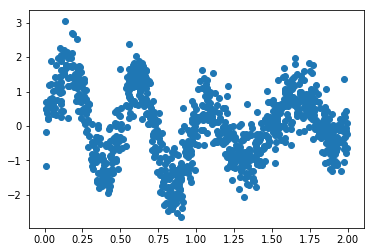

In [42]:
plt.scatter(df[0], df[1])
plt.show()

In [58]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(df[0], df[1], test_size=0.2)

xtrain = xtrain[:,np.newaxis]
xtest = xtest[:,np.newaxis]
xtrain.shape
xtest.shape
ytrain.shape

(800,)

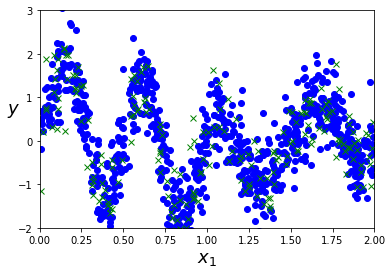

In [59]:
plt.plot(xtrain, ytrain, "bo",label='training set') # training set
plt.plot(xtest, ytest, "gx",label='validation set') # validation set

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, -2, 3])
plt.show()

In [60]:
report_train_mse=np.zeros(100)
report_test_mse=np.zeros(100)

In [390]:
derajat_polinom=15
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=derajat_polinom, include_bias=False)
xtrain_poly = poly_features.fit_transform(xtrain)

In [391]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(xtrain_poly, ytrain)
lin_reg.intercept_, lin_reg.coef_

(-0.12792586968206035,
 array([ 5.89730055e+01, -1.48809126e+03,  1.92897230e+04, -1.27074972e+05,
         4.59945781e+05, -9.58191763e+05,  1.08827667e+06, -3.51357525e+05,
        -8.23209020e+05,  1.43202924e+06, -1.16178205e+06,  5.66115386e+05,
        -1.69217637e+05,  2.87368984e+04, -2.13163846e+03]))

In [392]:
ytrain_predict=lin_reg.predict(xtrain_poly)
ytrain_predict.shape

(800,)

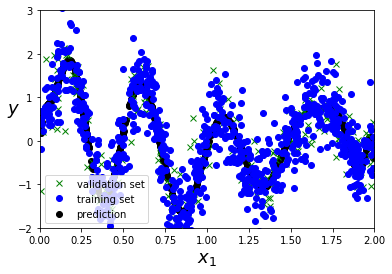

In [393]:
# grafik menunjukkan overfitting
plt.scatter(xtrain, ytrain_predict, color='k', label="prediction")
plt.plot(xtest, ytest, "gx",label='validation set') # training set
plt.plot(xtrain, ytrain, "bo",label='training set') # training set



plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, -2,3])

plt.legend(loc='lower left')
plt.show()

In [394]:
train_mse=sklearn.metrics.mean_squared_error(ytrain, ytrain_predict)
xtest_poly = poly_features.fit_transform(xtest)
ytest_predict=lin_reg.predict(xtest_poly)
test_mse=sklearn.metrics.mean_squared_error(ytest, ytest_predict)

In [395]:
report_train_mse[derajat_polinom]=train_mse
report_test_mse[derajat_polinom]=test_mse
report_train_mse

array([0.        , 1.01496725, 0.90354731, 0.87247415, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.64367015, 0.4073809 , 0.        , 0.        , 0.        ,
       0.25892888, 0.        , 0.        , 0.        , 0.24507339,
       0.24495445, 0.24484474, 0.        , 0.24482462, 0.24479028,
       0.24478411, 0.24485393, 0.24496955, 0.24505227, 0.24503906,
       0.24493189, 0.24480022, 0.24470842, 0.24466495, 0.2446601 ,
       0.24592809, 0.24633622, 0.24613807, 0.24575652, 0.24619442,
       0.30321963, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

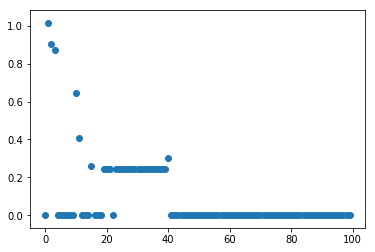

In [396]:
plt.scatter(range(100),report_train_mse)

In [397]:
report_test_mse

array([0.        , 1.01215433, 0.88309757, 0.84439546, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.61999971, 0.44348724, 0.        , 0.        , 0.        ,
       0.28115227, 0.        , 0.        , 0.        , 0.27734146,
       0.2767854 , 0.27653466, 0.        , 0.27641165, 0.27618133,
       0.2763583 , 0.276685  , 0.27746215, 0.2778483 , 0.27795825,
       0.27757247, 0.27717972, 0.27666558, 0.27639542, 0.2763955 ,
       0.28143909, 0.28310617, 0.28304868, 0.2814156 , 0.28186944,
       0.33393069, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [350]:
df_test = pandas.read_csv('el4233-2018-2019-02-01-test.csv', header=None)
df_test

,0,1
0,0,0.412077
1,1,1.408084
2,2,0.597636
3,3,1.057357
4,4,0.174777
5,5,1.711870
6,6,1.681215
7,7,0.206816
8,8,1.776814
9,9,0.383256


In [351]:
x = df_test[1][:,np.newaxis]
x_poly = poly_features.fit_transform(x)
ypredict = lin_reg.predict(x_poly)
print(ypredict)
ypredict.shape

[-1.19605583 -0.59947457  1.38848758 ...  1.38920223  0.28281297
  0.54050741]


(2000,)

In [352]:
df_test[2] = pandas.Series(ypredict)
print(df_test)
df_test = df_test.iloc[:, 1:3]
df_test.to_csv('el4233-hasil.csv', header=None)

         0         1         2
0        0  0.412077 -1.196056
1        1  1.408084 -0.599475
2        2  0.597636  1.388488
3        3  1.057357  0.517658
4        4  0.174777  1.802314
5        5  1.711870  0.823458
6        6  1.681215  0.878723
7        7  0.206816  1.518642
8        8  1.776814  0.501514
9        9  0.383256 -1.211599
10      10  0.632508  1.332570
11      11  1.180341 -0.125305
12      12  1.755183  0.635538
13      13  1.599650  0.673531
14      14  0.153841  1.829798
15      15  1.036084  0.403589
16      16  1.088464  0.539321
17      17  0.975142 -0.313846
18      18  1.455828 -0.296788
19      19  0.423218 -1.129778
20      20  1.449753 -0.337691
21      21  0.185377  1.738135
22      22  0.379857 -1.198571
23      23  0.347664 -0.931195
24      24  0.676826  0.786739
25      25  1.291469 -0.896529
26      26  0.951091 -0.692065
27      27  1.537486  0.279634
28      28  0.642298  1.254063
29      29  1.396314 -0.665077
...    ...       ...       ...
1970  19